### Sklearn实现SVM3（高斯核） 

In [1]:
# 导入包
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle

In [2]:
# 加载数据
def loadDataSet(fileName):
    dataMat = []
    labelMat = []

    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]),float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

X,y = loadDataSet('./data/svm2.txt')
print(X[0:5])
print(y[0:5])

[[-0.214824, 0.662756], [-0.061569, -0.091875], [0.406933, 0.648055], [0.22365, 0.130142], [0.231317, 0.766906]]
[-1.0, 1.0, -1.0, 1.0, -1.0]


In [3]:
# 使用高斯核
model = SVC(C=1,kernel='rbf') # gamma vs sigma
model.fit(X,y)

SVC(C=1)

In [4]:
# 预测
model.predict(np.array([[7.8862,0.1918]]))

array([-1.])

In [5]:
# 模型其他相关属性
print('各类别各有多少个支持向量',model.n_support_) # 列表形式，每个元素对应每个类别
print('各类别支持向量在训练样本中的索引',model.support_) 
print('各类所有的支持向量',model.support_vectors_)
print('支持向量的alpha值',model.dual_coef_) # 与上一行的支持向量一一对应


各类别各有多少个支持向量 [16 12]
各类别支持向量在训练样本中的索引 [ 6 21 27 30 36 41 42 48 53 58 65 76 78 85 87 99 14 18 19 23 26 29 34 45
 54 56 62 74]
各类所有的支持向量 [[-0.557789  0.375797]
 [-0.475167 -0.346247]
 [ 0.61908  -0.088188]
 [ 0.539368 -0.374972]
 [-0.403483  0.474466]
 [-0.012998  0.525985]
 [ 0.153738  0.491531]
 [-0.7016    0.190983]
 [ 0.595222  0.20957 ]
 [-0.307768  0.503038]
 [-0.755431  0.096711]
 [ 0.334204  0.381237]
 [ 0.227222  0.527437]
 [ 0.297885 -0.632874]
 [ 0.541359 -0.205969]
 [-0.725568 -0.292022]
 [-0.413576  0.145681]
 [-0.392868 -0.125261]
 [ 0.353588 -0.070617]
 [ 0.394164 -0.058217]
 [-0.449349 -0.038074]
 [-0.015165  0.359326]
 [ 0.253289 -0.285861]
 [ 0.068286  0.392741]
 [ 0.229465  0.250409]
 [ 0.3843   -0.17657 ]
 [-0.203272  0.286855]
 [-0.448939  0.176725]]
支持向量的alpha值 [[-0.41958351 -1.         -1.         -0.76568057 -0.87441932 -1.
  -1.         -1.         -0.44300379 -1.         -0.38183024 -1.
  -0.09168169 -0.61099064 -1.         -0.41281024  1.          1.
   1.     

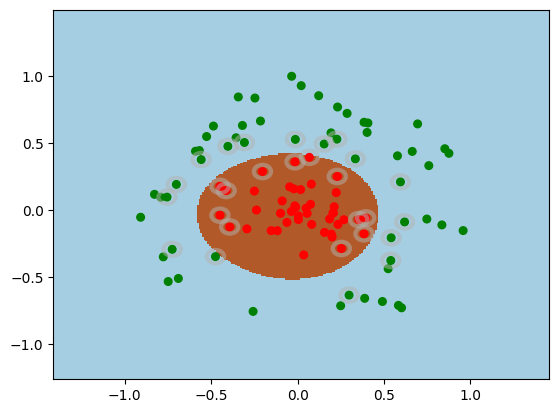

In [11]:
# 通过支持向量索引这一属性，绘制支持向量
fig = plt.figure()
ax = fig.add_subplot(111)

# 利用网格法绘制决策平面
h = 0.01
x_min, x_max = np.array(X)[:,0].min() - .5, np.array(X)[:,0].max() + .5
y_min, y_max = np.array(X)[:,1].min() - .5, np.array(X)[:,1].max() + .5

xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Paired)

# 绘制样本点
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

# 绘制支持向量
alphas_non_zeros_index = model.support_
for i in alphas_non_zeros_index:
    circle = Circle((X[i][0],X[i][1]),0.05,facecolor='none',edgecolor=(0.7,0.7,0.7),linewidth=3,alpha=0.5)
    ax.add_patch(circle)

plt.show()